In [ ]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
uselog= False
data = dp.prepare_data(uselog=uselog)
data = data[data.index >= '1927-01-01']

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [19]:
model_forecast = pd.read_csv('../../Data/ModelData/oos_predictions.csv', parse_dates=['date'], index_col='date')


In [20]:
df = pd.merge(data, model_forecast, left_index=True, right_index=True, how='left')

In [21]:
df.columns

Index(['price', 'd12', 'e12', 'ret', 'retx', 'AAA', 'BAA', 'lty', 'ltr',
       'corpr', 'tbl', 'Rfree', 'd/p', 'd/y', 'e/p', 'd/e', 'b/m', 'tms',
       'dfy', 'dfr', 'infl', 'eqis', 'ntis', 'svar', 'cay', 'i/k', 'csp',
       'pce', 'vp', 'impvar', 'vrp', 'govik', 'lzrt', 'skew', 'crdstd', 'ogap',
       'wtexas', 'accrul', 'cfacc', 'sntm', 'ndrbl', 'skvw', 'tail', 'fbm',
       'dtoy', 'dtoat', 'ygap', 'rdsp', 'rsvix', 'gpce', 'gip', 'tchi',
       'house', 'avgcor', 'shtint', 'disag', 'equity_premium',
       'y_true_pcr_without_lookahead_ar', 'y_pred_pcr_without_lookahead_ar',
       'y_true_combination_completed_v2', 'y_pred_combination_completed_v2',
       'y_true_combination_completed', 'y_pred_combination_completed',
       'y_true_chronos2_without_lookahead',
       'y_pred_chronos2_without_lookahead',
       'y_true_tabpfn_without_lookahead_ar',
       'y_pred_tabpfn_without_lookahead_ar',
       'y_true_tabpfn_without_lookahead_ar_non_log',
       'y_pred_tabpfn_without_lo

In [25]:
bt = tsh.backtest_timing_strategy(df,pred_col = "y_pred_chronos2_without_lookahead_non_log", gamma=5.0, vol_window=60, uselog= uselog)
summary = tsh.compare_strategies(bt, gamma=5.0)
print("Chronos-2 without lookahead non-log strategy backtest summary:")
print(summary)


Chronos-2 without lookahead non-log strategy backtest summary:
          TotalReturn      CAGR    AnnVol    Sharpe  MaxDrawdown       CEV  \
Strategy                                                                     
Model     1388.922086  0.128192  0.131711  0.652104    -0.398469  0.086581   
HA         122.616045  0.083597  0.135434  0.339374    -0.596701  0.044090   
W50         88.105142  0.077701  0.075431  0.450079    -0.278997  0.063685   
W100       404.373810  0.105260  0.150742  0.450079    -0.502159  0.055124   

          Δu vs HA  Δu vs 50%  Δu vs 100%  
Strategy                                   
Model     0.042491   0.022896    0.031457  
HA             NaN        NaN         NaN  
W50            NaN        NaN         NaN  
W100           NaN        NaN         NaN  


In [ ]:
#loop over all columns containing "y_pred" and backtest each strategy
for col in df.columns:
    if "y_pred" in col:
        print(f"Backtesting strategy for {col}")
        bt = tsh.backtest_timing_strategy(df[df.index >= "1965-01-01"],pred_col = col, gamma=5.0, vol_window=60, uselog= uselog)
        summary = tsh.compare_strategies(bt, gamma=5.0)
        print(summary)
        
        print("\n")

Backtesting strategy for y_pred_pcr_without_lookahead_ar


TypeError: compare_strategies() got an unexpected keyword argument 'uselog'

In [49]:
from importlib import reload
reload(plot_ts)
reload(tsh)

<module 'source.trading_strategies.trading_strategy' from '/Users/kilianrunnwerth/Masterarbeit/source/trading_strategies/trading_strategy.py'>

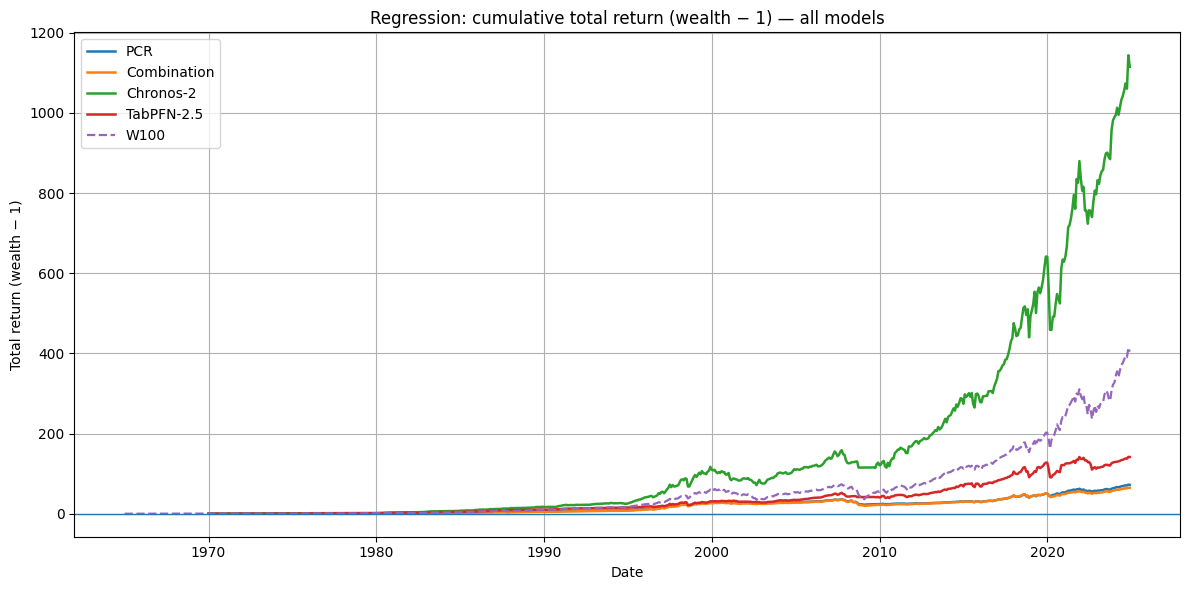

In [6]:
model_pred_cols = {
    "PCR": "y_pred_pcr_without_lookahead_ar",
    "Combination": "y_pred_combination_completed",
    "Chronos-2": "y_pred_chronos2_without_lookahead",
    "TabPFN-2.5": "y_pred_tabpfn_without_lookahead_ar",
}

plot_ts.plot_regression_timing_total_return_models(
    df[df.index >= "1965-01-01"],
    model_pred_cols=model_pred_cols,
    target_col="equity_premium",
    rf_col="Rfree",
    uselog=uselog,
    gamma=5.0,
    vol_window=60,
    baselines=["100"],   # choose any subset
    title="Regression: cumulative total return (wealth − 1) — all models",
)
